# Projet réalisée par Ulrich G. Segodo
## Binôme avec qui, j'ai discuté de certaines questions : Boris Gomez

# 1. Expliquer et définir chacune des 7 colonnes du fichier des objets trouvés.

* Colonne 1 : C'est la colonne qui contient toutes les dates et heures auxquelles ont été trouvé un objet dans un gare donné
* Colonne 2 : Elle contient toutes les dates et heures auxquelles ont été restitués un objet trouvé
* Colonne 3 : Elle contient le nom de toutes les gares gérée par la SNCF
* Colonne 4 : Elle le Code UIC, code numérique attribué par l'organisation internationale des chemins de fer qui est propre à chaque gare
* Colonne 5 : Elle décrit la nature des objets trouvé
* Colonne 6 : Elle décrit les types d'objet trouvé
* Colonne 7 : Elle donne une information sur le type d'enregistrement effectué

In [1]:
! pip install geopy
! pip install folium

In [2]:
import pandas as pd
import datetime
import calendar
import matplotlib.pyplot as plt
from geopy.geocoders import Nominatim 


# 2. Chargement du jeu de données en pandas.
* Remarque
Au moment du chargement, on a l'erreur ci dessous qui est une erreur de delimiteur c'est à dire que dans le fichier csv le sépérateur utilisé  n'est pas une virgule ',' mais plutôt un point virgule ';' lorsque ouvre le fichier avec un lecteur csv et on vérifie

In [3]:
trouves = pd.read_csv('objets-trouves-restitution.csv')

ParserError: Error tokenizing data. C error: Expected 1 fields in line 3, saw 4


* Pour pallier à ce problème, nous allons préciser lors du chargement en pandas le délimiteur

In [4]:
trouves = pd.read_csv('objets-trouves-restitution.csv', sep=';')
trouves.head(2)

,Date,Date et heure de restitution,Gare,Code UIC,Nature d'objets,Type d'objets,Type d'enregistrement
0,2020-09-17T14:04:04+02:00,2020-09-26T18:13:03+02:00,Bordeaux Saint-Jean,87581009.0,Autres divers,Divers,Objet trouvé
1,2020-09-17T14:34:40+02:00,2020-11-06T10:09:05+01:00,Rennes,87471003.0,"Porte-monnaie, portefeuille","Porte-monnaie / portefeuille, argent, titres",Objet trouvé


# 3. Décrire le jeu de données

In [5]:
trouves.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 685082 entries, 0 to 685081
Data columns (total 7 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   Date                          685082 non-null  object 
 1   Date et heure de restitution  233819 non-null  object 
 2   Gare                          684791 non-null  object 
 3   Code UIC                      684791 non-null  float64
 4   Nature d'objets               685082 non-null  object 
 5   Type d'objets                 685082 non-null  object 
 6   Type d'enregistrement         685082 non-null  object 
dtypes: float64(1), object(6)
memory usage: 36.6+ MB


# 4. Ce jeu de données contient deux colonnes de dates. Convertir ces colonnes en format de date plus utilisable pour la suite. C’est-à-dire un format où il est plus simple de récupérer l’année, le mois ou le jour par exemple

In [6]:
df_trouves = trouves.copy()

In [7]:
# première colonne de date et on le convertir en format date
df_trouves["Date"] = pd.to_datetime(df_trouves["Date"], utc=True, errors='coerce')

In [8]:
# On récupère juste la date en yyyy-mm-dd
## Pour récupérer les heures, je met time()
df_trouves["Date"] = df_trouves["Date"].apply(lambda x: x.date())

In [9]:
# Deuxième colonne de date
df_trouves["Date et heure de restitution"]  = pd.to_datetime(df_trouves["Date et heure de restitution"], utc=True, errors='coerce')

In [10]:
df_trouves["Date et heure de restitution"] = df_trouves["Date et heure de restitution"].apply(lambda x: x.date())

# 5. La date du début du jeu de données

In [11]:
df_trouves["Date"].sort_values().head(1)

110637    2013-05-24
Name: Date, dtype: object

# 6.a Année, mois, jour de la semaine avec plus d'objet trouvés et déclarés perdus avec graphiques

In [12]:
# Chargeons la base des objets déclarés perdus
perdus = pd.read_csv('objets-trouves-gares.csv', sep=";")
df_perdus = perdus.copy()

In [13]:
# On met la date en format utilisable
df_perdus["Date"] = pd.to_datetime(df_perdus["Date"], utc=True, errors = 'coerce')

In [14]:
df_perdus["Date"] = df_perdus["Date"].apply(lambda x: x.date())

# Année avec plus d'objet trouvés et déclarés perdus

In [15]:
# On récupère juste l'année de la colonne date
df_trouves["Year"] = (pd.to_datetime(df_trouves["Date"])).dt.year
df_perdus["Year"] = (pd.to_datetime(df_perdus["Date"])).dt.year

In [16]:
# On crée un dataframe en associant à chaque année le nombre d'objet trouvé
df1 = pd.DataFrame(df_trouves["Year"].value_counts()).reset_index()
df1.columns = ["Année", "Trouvés"]

In [17]:
# On crée un dataframe en associant à chaque année le nombre d'objet déclarés perdus
df2 = pd.DataFrame(df_perdus["Year"].value_counts()).reset_index()
df2.columns = ["Année", "Déclarés_perdus"]

In [18]:
# La jointure entre des deux bases, nous donne un dataframe, associant à chaque année, 
# le nombre d'objet trouvé et déclarés perdus  
merged_df = (df1.merge(df2, left_on='Année', right_on="Année")).sort_values("Année")

<AxesSubplot:xlabel='Année'>

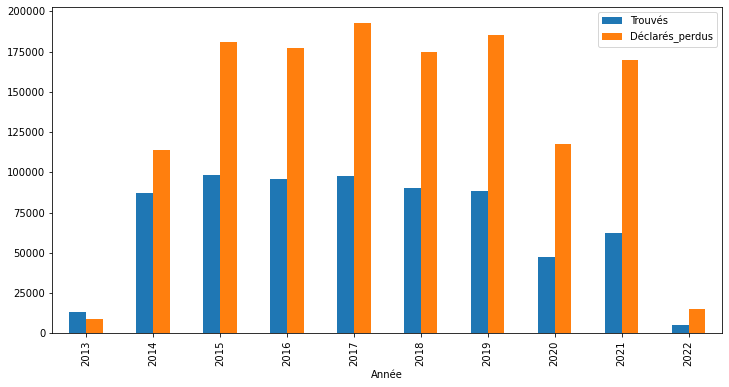

In [19]:
merged_df.plot(x="Année", kind = "bar", figsize=(12, 6))

* Mois avec plus d'objet trouvés et déclarés perdus

In [20]:
# On récupère juste le mois
df_trouves["Month"] = (pd.to_datetime(df_trouves["Date"])).dt.month
df_perdus["Month"] = (pd.to_datetime(df_perdus["Date"])).dt.month

In [21]:
# On transforme la valeur numérique des mois en lettre
#df_trouves["Month"] = [calendar.month_name[m] for m in df_trouves["Month"]]
#df_perdus["Month"] = [calendar.month_name[m] for m in df_perdus["Month"]]
df_trouves["Month"] = df_trouves["Month"].apply(lambda x : calendar.month_name[x])
df_perdus["Month"] = df_perdus["Month"].apply(lambda x : calendar.month_name[x])

In [22]:
# Crétion de deux dataframe pour la jointure
df1 = pd.DataFrame(df_trouves["Month"].value_counts()).reset_index()
df1.columns = ["Mois", "Trouvés"]
df2 = pd.DataFrame(df_perdus["Month"].value_counts()).reset_index()
df2.columns = ["Mois", "Déclarés_perdus"]

<AxesSubplot:xlabel='Mois'>

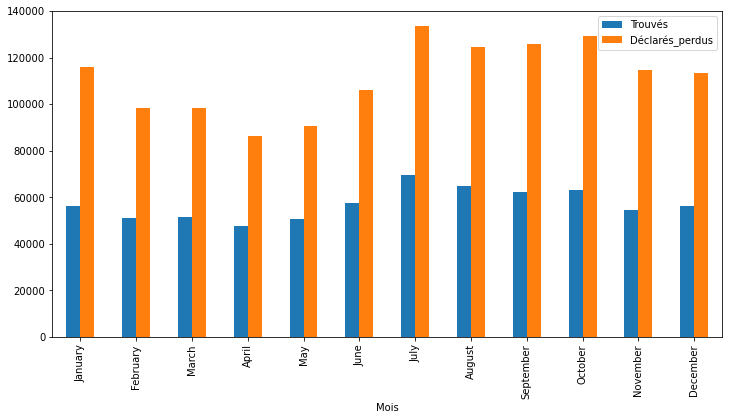

In [23]:
# Jointure
merged_df = (df1.merge(df2, left_on='Mois', right_on="Mois")).sort_values("Mois")

# On crée un vecteur de tri afin d'ordonner la colonne month
sort_order = ["January", "February", "March", "April", "May", "June", "July", "August", "September",
              "October", "November", "December"]

# On change l'index du dataframe afin de faire le tri en fonction du nom des mois
merged_df.index = pd.CategoricalIndex(merged_df["Mois"], categories=sort_order, ordered=True)

# On fait le tri et ensuite on supprime les index créer pour avoir des valuers numeriques
merged_df = merged_df.sort_index().reset_index(drop=True)

# Graphique
merged_df.plot(x="Mois", kind = "bar", figsize=(12, 6))

* Le jour avec plus d'objet trouvés et déclarés perdus

In [24]:
# On récupère le jour de la date et on le convertir en lettre
df_trouves["Day"] = pd.to_datetime(df_trouves["Date"], format="%Y/%m/%d").apply(lambda x : x.day_name())

In [25]:
df_perdus["Day"] = pd.to_datetime(df_perdus["Date"], format="%Y/%m/%d").apply(lambda x : x.day_name())

In [26]:
# Création de 2 dataframes pour la jointure
df1 = pd.DataFrame(df_trouves["Day"].value_counts()).reset_index()
df1.columns = ["Day", "Trouvés"]
df2 = pd.DataFrame(df_perdus["Day"].value_counts()).reset_index()
df2.columns = ["Day", "Déclarés_perdus"]

<AxesSubplot:xlabel='Day'>

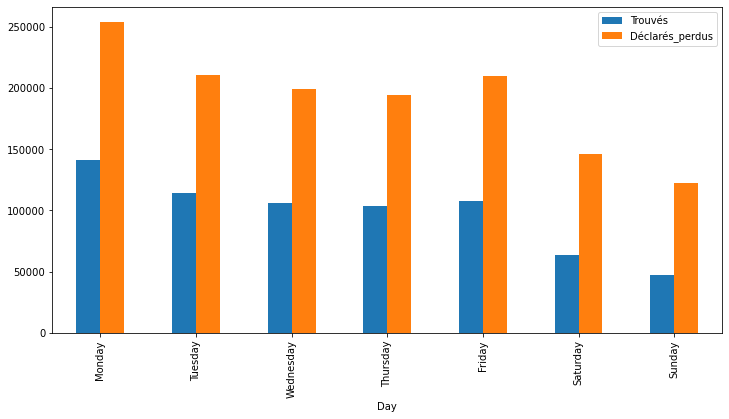

In [27]:
# Jointure
merged_df = (df1.merge(df2, left_on='Day', right_on="Day"))

# On crée un vecteur de tri afin d'ordonner la colonne day
sort_order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]

# On change l'index du dataframe afin de faire le tri en fonction du nom des jours
merged_df.index = pd.CategoricalIndex(merged_df["Day"], categories=sort_order, ordered=True)

# On fait le tri et ensuite on supprime les index créer pour avoir des valuers numeriques
merged_df = merged_df.sort_index().reset_index(drop=True)
merged_df.plot(x="Day", kind = "bar", figsize=(12, 6))

# 6.b. Tracer trois courbes affichant l’évolution du nombres d’objets déclarés perdus, trouvés et restitué depuis le début du jeu de donnée

In [28]:
# On crée un dataframe dans lequel on compte le nombre d'objet trouvé à partir de la colonne date
df1 = pd.DataFrame(pd.to_datetime(df_trouves["Date"]).dt.year).value_counts().reset_index()
df1.columns = ["Year", "Trouvés"]

# On crée un dataframe dans lequel on compte le nombre d'objet trouvé et restituer à partir de 
# la colonne date et heure de restitution
df2 = pd.DataFrame(pd.to_datetime(df_trouves["Date et heure de restitution"]).dt.year).value_counts().reset_index()
df2.columns = ["Year", "Restitués"]

# On crée un dataframe dans lequel on compte le nombre d'objet déclarés perdus à partir de 
# la colonne date et base objet déclarés perdus
df3 = pd.DataFrame(pd.to_datetime(df_perdus["Date"]).dt.year).value_counts().reset_index()
df3.columns = ["Year", "Déclarés perdus"]

<AxesSubplot:xlabel='Year'>

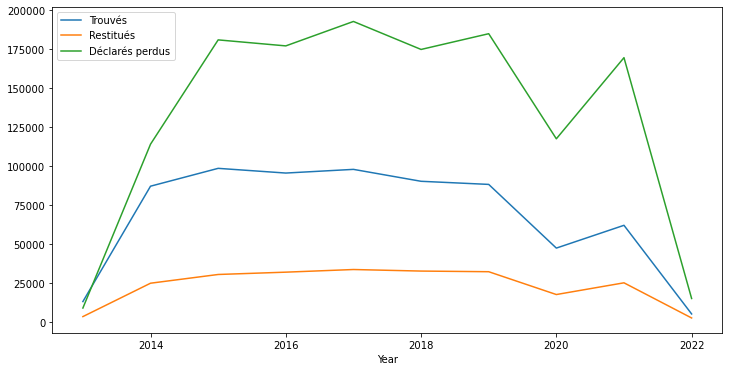

In [29]:
# Jointure et Graphique
merged_df = df1.merge(df2, left_on="Year", right_on="Year")
merged_df = merged_df.merge(df3, left_on="Year", right_on="Year").sort_values("Year")
merged_df.plot(x="Year", kind="line", figsize=(12, 6))

# 7. Trouver les 3 gares où il y a le plus d’objets restitués en pourcentage des objets trouvés
* Pour répondre à cette question, il faut connaitre le nombre d'objet trouvé par gare ainsi que le nombre d'objet restitutué par gare. Ensuite faire le rapport et afficher les 3 gares où, le rapport restitué/trouvé en pourcentage est plus élévé. Or le nombre d'objet trouvés dépend de la colonne Date et le nombre d'objet restitué dépend de la colonne Date et heure de restitution; Donc on procède comme suit:

In [30]:
# On groupe par gare
df = df_trouves.groupby("Gare").count()

# On fait le rapport entre la colonne date de restitution et date
(df["Date et heure de restitution"] / df["Date"] *100).sort_values(ascending=False).head(3)

Gare
Bellegarde         64.265130
Dieppe             62.376238
Bourg-en-Bresse    62.119205
dtype: float64

# 8.a. Calculer le volume d’objets déclarés perdus par gare

In [31]:
# On compte pour chaque gare le nombre de fois où il apparait dans le dataframe
df_volume = df_perdus["Gare"].value_counts().reset_index()
df_volume.columns = ["Gare", "Volume d'objets déclarés perdus"]
df_volume

,Gare,Volume d'objets déclarés perdus
0,Paris Gare de Lyon,45961
1,Paris Montparnasse,39101
2,Paris Gare du Nord,29430
3,Paris Saint-Lazare,29289
4,Strasbourg,18663
...,...,...
178,Paris Gare de Lyon Hall 1 & 2,9
179,Paris Montparnasse Hall 1 & 2,7
180,Argenteuil,6
181,Bar-le-Duc,2


# 8.b. Associer à chaque gare une position GPS pour pouvoir l’afficher sur la carte

* La méthode commenté dans la cellule en-dessous est une méthode avec geopy pour avoir la latitude et la
longitude associé à chaque gars. Mais je me suis rendu compte que cela prend trop de temps avant de s'exécuter. Alors
j'ai décidé de télécharger la base Gare de Voyageurs qui est sur le site de la SNCF pour effectuer une jointure et obtenir la latitude et la longitude de façon plus optimale. J'ai exposé cette méthode à la suite.

In [32]:
# On concatène le mot Gare à tous les nom de gare qui ne contient par Gare
    # df_volume["Gare"] = df_volume["Gare"].apply(lambda x: x if "Gare" in x else "Gare "+ x)
# Utilisation de l'Api de geopy pour rechercher les coordonnées de chaque gare
    # loc = Nominatim(user_agent="GetLoc") 
    # df_volume["Coordonnées"] = (df_volume["Gare"].apply(loc.geocode))
    # df_volume["Latitude"] = df_volume["Coordonnées"].apply(lambda x: (x.latitude) if x is not None else x)
    # df_volume["Longitude"] = df_volume["Coordonnées"].apply(lambda x: (x.longitude) if x is not None else x)

* La nouvelle méthode consiste à créer une dataframe avec la liste des gares et leurs llatitude et longitude qu'on utilisera dans les questions suivantes

In [33]:
# On importe la base Gare de voyageurs
location = pd.read_csv('referentiel-gares-voyageurs.csv', sep=";") 

In [34]:
# On crée un dataframe qui est la jointure entre la base d'objets déclarés perdus et location
df = df_perdus.merge(location, left_on="Code UIC", right_on="Code UIC")

# On récupère ensuite les 3 colonnes qui nous intèresse en supprimant les doublons et les nan
df_location = df[["Gare_x","Latitude","Longitude"]].drop_duplicates().dropna(subset=["Gare_x"])

* Pour générer notre carte, nous allons effectuer une jointure entre df_volume et df_location
pour assoicier à chaque gars, le volume d'objets perdus, la latitude et longitude

In [35]:
df_volume = df_volume.merge(df_location, right_on="Gare_x", left_on="Gare")
df_volume.head(2)

,Gare,Volume d'objets déclarés perdus,Gare_x,Latitude,Longitude
0,Paris Gare de Lyon,45961,Paris Gare de Lyon,48.844888,2.373520
1,Paris Montparnasse,39101,Paris Montparnasse,48.841172,2.320514


In [36]:
import folium
mapcarte = folium.Map(location=[46.227638, 2.213749],zoom_start=6)
#df_volume.apply(lambda x: folium.Marker([df_volume["Coordonnées"]]).add_to(mapcarte))
for ind,gare,lat,lon in df_volume[["Gare","Latitude","Longitude"]][:175].itertuples():
    folium.Marker([lat, lon], popup=gare,
                  color='green',
                  icon=folium.Icon(color='green'),
                ).add_to(mapcarte)   
mapcarte.save('output1.html')

# 8.c. Afficher la donnée sur la carte

In [37]:
mapObj = folium.Map(location=[46.227638, 2.213749],zoom_start=6)

for ind,gare, vol,lat,lon in df_volume[["Gare", "Volume d'objets déclarés perdus", "Latitude","Longitude"]][:].itertuples():
    folium.Circle(location=[lat, lon],
                  radius=vol,
                  weight=2,
                  color='green',
                  fill_color='red',
                  tooltip="Click me!",
                  popup=("<h4  style='color:#0023F5;'><b>" + str(gare) 
                         +"</h4></b>" +"\n"+" <b>Volume Perdus : </b>"+ str(vol)
                         )
                  ).add_to(mapObj)
mapObj.save('output2.html')

# 8.D Bonus — Ajouter un sélecteur de “type d’objets” pour avoir une carte par catégorie

In [38]:
# On fait un regrouper par gare et par type d'objet
df_selecteur = df_perdus.groupby(["Gare", "Type d'objets"]).size().reset_index(name="Count")
df_selecteur.head(2)

,Gare,Type d'objets,Count
0,Abbeville,"Appareils électroniques, informatiques, appare...",4
1,Abbeville,"Bagagerie: sacs, valises, cartables",16


In [39]:
# On fait une jointure avec notre dataframe location pour avoir les coordonnées de chaque gare
df_selecteur = df_selecteur.merge(df_location, left_on="Gare", right_on="Gare_x")

In [40]:
from os import name
mapCart = folium.Map(location=[46.227638, 2.213749],zoom_start=6)

# On crée un vecteur contenant les différents types d'objet déclarés perdus
typeObjets= df_selecteur["Type d'objets"].drop_duplicates()

# On crée une liste de couleur pour distinguer les couleurs des selecteurs
colors = ["#EB3324", "#3A0603", "#000C7B", "#F08036", "#7E84F7", "#732BF5", "#00023D", "#58135E",
          "#75F94D", "#EE8AF8", "#EA3FF7", "#EA3680", "#377D22", "#367E7F", "#39107B", "#DE5F0B"] 

# indice de choix des couleurs
i=0
for typeObjet in typeObjets:
    # On applique un filtre sur le dataframe en fonction du type d'objets en cours
    df_filtre = df_selecteur[df_selecteur["Type d'objets"] == typeObjet]
    # On crée un layer pour le type d'objet en cours
    shapesLayer = folium.FeatureGroup(name=typeObjet).add_to(mapCart)
    
    #On fait une boucle qui permet de créer la couche de marqueur pour l'objet en cours
    for ind,gare,vol,lat,lon in df_filtre[["Gare", "Count", "Latitude","Longitude"]][:].itertuples():
        folium.Circle(location=[lat, lon],
                    radius=vol,
                    weight=2,
                    color=colors[i],
                    fill_color='red',
                    tooltip="Click me!",
                    popup=("<h4  style='color:#377D22;'><b>Type d\'objets: </h4></b> : "+ str(typeObjet)+
                           "<h4  style='color:#0023F5;'><b>" + str(gare) +"</h4></b>" 
                           +"\n"+" <b>Volume Perdus : </b>"+ str(vol)
                            )
                    ).add_to(shapesLayer)
    i=i+1
folium.LayerControl().add_to(mapCart)

mapCart.save('output3.html')

# 9. Question libre. Faire un graphique pour montrer le type d'objet le plus perdus

In [41]:
df = df_perdus.groupby("Type d'objets").size().reset_index(name="Count")

<AxesSubplot:xlabel="Type d'objets">

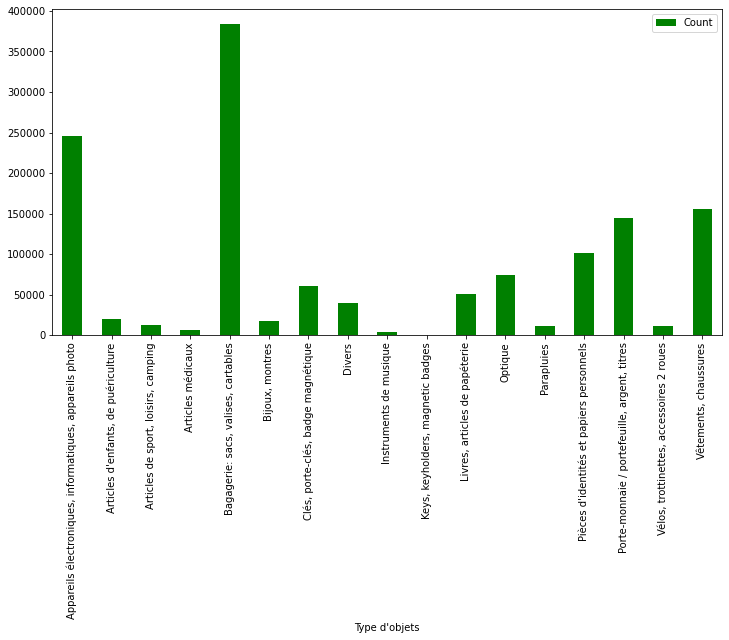

In [42]:
df.plot(x="Type d'objets", y="Count", kind="bar", figsize=(12, 6), color="green")

# 10. Créer un modèle de machine learning qui pourra prédire le nombre d’objets perdus en 2022. 

In [43]:
# On regroupe les données par année
df_learn = df_perdus.groupby(["Year"]).size().reset_index(name="ObjetPerdus")


In [44]:
from sklearn import linear_model

regr = linear_model.LinearRegression()

# On supprime la ligne de 2022
df_learn.drop(df_learn[df_learn["Year"] == 2022].index, inplace=True)

# On cherche à prédire le nombre d'objet perdus en 2022
regr.fit(df_learn[["Year"]], df_learn["ObjetPerdus"])

print(regr.coef_, regr.intercept_)


[10988.25] -22016468.694444448


In [47]:
# On prédit la valeur de 2022
texte =regr.predict([[2022]])
regr.predict([[2022]])

array([201772.80555556])

11. Bonus — Produire une image PNG au format 2000 x 2000 qui affiche les résultats à toutes les questions précédentes.